

# Project II: Investigation of IMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this exercise, I plan to investigate the imdb movie dataset. This dataset consists of movies released between years 1960 and 2015. Some of the interesting columns in the dataset are cast, budget, revenue, voting, genres and director. There are challenges as well in this dataset associated Data cleaning like nulls and duplicates and Data wrangling like creating new columns

> I intend to investigate questions like :-
>
> Which is the most popular genre?
>
> What are the top 10 most profitable movie?
>
> What is the relationship between Profit and budget?
>
> What is the relationship between Budget and revenue?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Let begin by importing the dataset and performing basic investigation on it to understand the columns and their datatypes.


### General Properties

In [3]:
#reading the movie dataset
df_movie = pd.read_csv("tmdb-movies.csv") #takes the id column as index\
#df_movie = pd.read_csv("tmdb-movies.csv")

In [4]:
df_movie.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Get basic statistical summary of data
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#assesing datatype of each column in data
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# check for duplicates in the data
sum(df_movie.duplicated())

1

In [9]:
# no. of unique values
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
## Check for any missing values in the data
df_movie.isnull().values.any()

True

In [11]:
#how many missing values exist
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> There seem to be duplicates and nulls in the data as indicated by the above two statements. Look as unique function output table and note the difference in numbers in the columns id and imdb_id column.


### Data Cleaning 


#### After initial data exploration, few data cleaning steps are needed to make data suitable for further analysis. They are :-


1. The columns Cast, Genre, Director, Keywords and Production_Companies contain "|" is their description. For analysis purpose these need to be removed or ignored during the analysis steps
2. One duplicate is found in the data set. It can be dropped from the dataset
3. Columns like homepage, overview, tagline and imdb_id can be dropped as they seem not to be significant for the current exercise. A shorter dataset may result in faster output of result due to faster and efficient processing.
4. Change the release_date in the date format

> Lets begin with taking care of the duplicate data and some of the irrelevant columns for this exercise

In [12]:
# drop duplicate
df_movie.drop_duplicates(inplace=True)

In [13]:
# confirm dropping of duplicate in the data
sum(df_movie.duplicated())

0

In [14]:
#Dropping few columns from the dataset
df_movie.drop(["homepage","overview","tagline","imdb_id","id"],axis = 1, inplace = True) 

In [15]:
# checking the data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


> Observe the reduction in no. of columns from 21 to 16 in the dataset. The above mentioned columns are no more part of the movie dataset

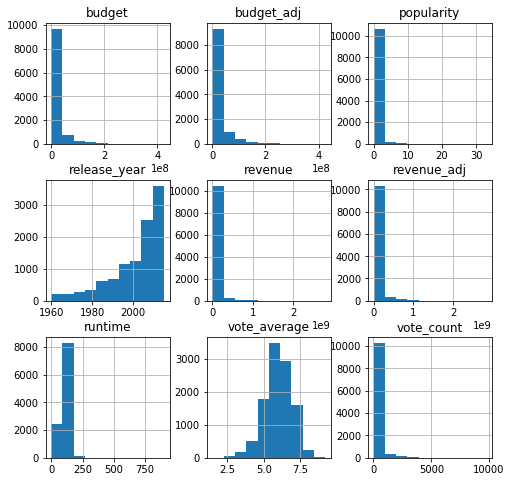

In [16]:
# explore data with plotting histogram for all the numerical columns
df_movie.hist(figsize=(8, 8));

> Histogram analysis shows some of the important attributes like budget, budget_adj, revenue, revenue_adj and runtime have many 0 values. A movie cannot have a 0 budget, hence these values indicate data issues may be due to wrong data entry. Zero values in column budget and revenue cannot be replaced by mean values either, as it will be a big aasumption to be made and can affect data analysis in wrong way as each movie is unique and budget vary. Leaving them as 0 skews the data. Thus they need to be replaced by NaN and later dropped if needed.

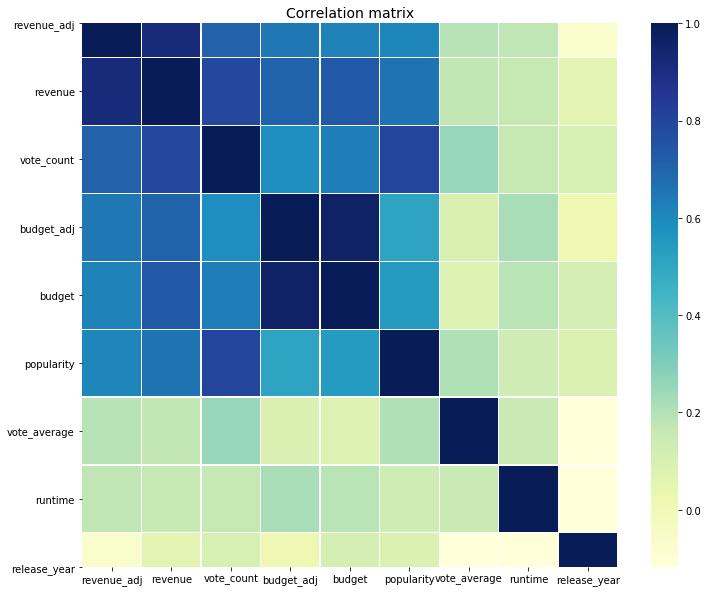

In [17]:
# movie dataset correlation matrix 
# k : number of variables for heatmap 
k = 10


corrmat = df_movie.corr() 

cols = corrmat.nlargest(k, 'revenue_adj')['revenue_adj'].index 
  
cm = np.corrcoef(df_movie[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
ax.set_title('Correlation matrix', fontsize = 14)

sns.heatmap(cm ,ax = ax,cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)

> The correlation matrix of the movie dataset. Columns revenue, revenue_adj and budget, budgte_adj sssm to to derivative of eachother and they are higly correlated.
Revenue_adj is most related to vote_count, budget and popularity. It is least correlated to release_year and runtime.

> Similar analysis can be seen below in a pair-scatter plots

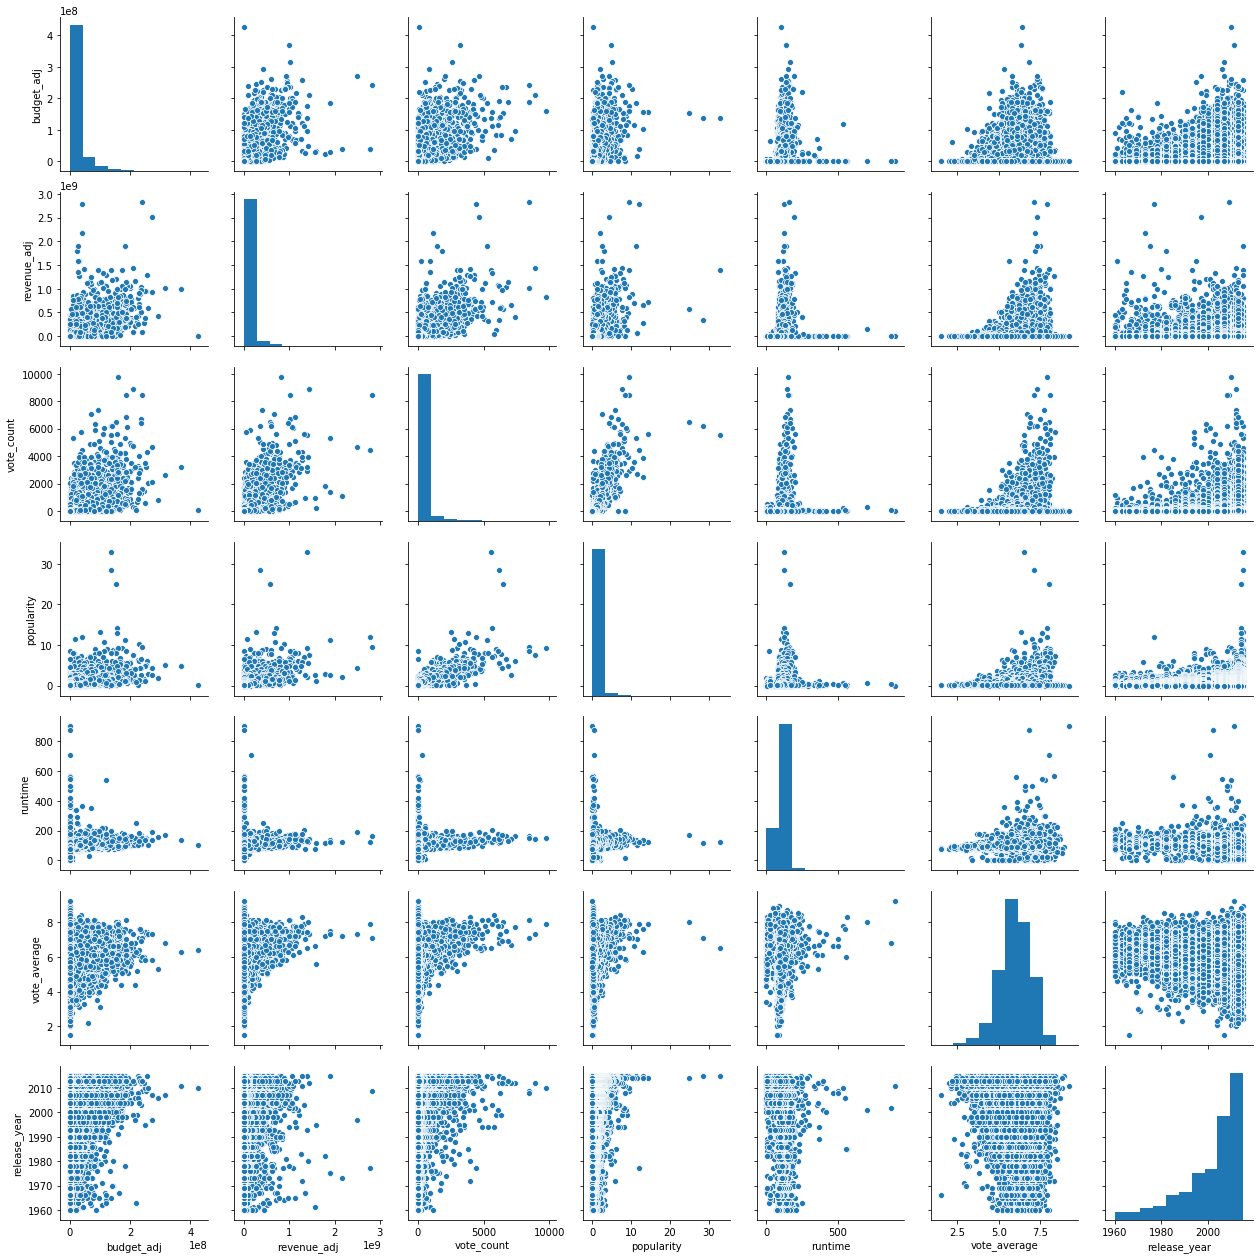

In [18]:
#Creatinf sub dtaset with selected columns
df_movie1 = df_movie[["budget_adj","revenue_adj","vote_count","popularity","runtime","vote_average","release_year"]]

# Create the default pairplot
sns.pairplot(df_movie1)

In [19]:
## Change the release_date format
df_movie.release_date = pd.to_datetime(df_movie['release_date'])
df_movie['release_date'].head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [20]:
## Check for an missing values in the data
df_movie.isnull().values.any()

True

In [21]:
rows, col = df_movie.shape
#Obtain data column and row count
print('There are {} observation and {} no. of columns. in the movie dataset'.format(rows-1, col))

There are 10864 observation and 16 no. of columns. in the movie dataset


In [22]:
## For example lets chcek the 0 values in column Cast
# creating series for NaN values  
Nan_series = pd.isnull(df_movie["cast"])  
    

# displaying data only with cast = NaN  
df_movie[Nan_series]  

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,NaN,7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,2015,0.000000,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,NaN,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,2015-10-09,37,8.2,2015,0.000000,0.0
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,manipulation|politics|war|control|fear,135,Documentary,BBC,2015-01-24,19,7.8,2015,0.000000,0.0
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,mustang|car|corporation|henry ford family|car ...,90,Documentary,NaN,2015-10-08,12,8.0,2015,0.000000,0.0
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,2015-01-01,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0.253376,0,0,Red's Dream,NaN,John Lasseter,NaN,4,Animation,Pixar Animation Studios,1987-08-17,44,6.6,1987,0.000000,0.0
9755,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,NaN,6,Drama,NaN,2068-01-01,12,6.7,1968,0.000000,0.0
10434,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,student movie|short,4,Animation,Pensylvania Academy of Fine Arts,2067-01-01,16,5.2,1967,1307.352748,0.0
10550,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,pixar animated short|luxo lamps|beach ball|fat...,2,Animation|Family,Pixar Animation Studios,1986-08-17,81,7.3,1986,0.000000,0.0


> The cast of the movie cannot be 0. This too indicates data issues. It is best to romove rows with zero values for the above mentioned columns

In [23]:
#replacing 0 with NaN
df_movie['revenue_adj'].replace(0, np.NAN, inplace=True)
df_movie['revenue'].replace(0, np.NAN, inplace=True)
df_movie['budget_adj'].replace(0, np.NAN, inplace=True)
df_movie['budget'].replace(0, np.NAN, inplace=True)
df_movie['runtime'].replace(0, np.NAN, inplace=True)
df_movie['cast'].replace(0, np.NAN, inplace=True)

In [24]:
## Dropping rows with NaN Values
df_movie.dropna(axis=0, inplace=True)

In [25]:
## Check for sum of missing values again
df_movie.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> Observe the sum of null values for some of the columns

In [26]:
# check the data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 488.4+ KB


In [27]:
rows, col = df_movie.shape
#Obtain data column and row count
print('There are {} observation and {} no. of columns. in the movie dataset'.format(rows-1, col))

There are 3676 observation and 16 no. of columns. in the movie dataset


> Notice the reduction in no. of observations. Rows with NaN were dropped thus only 3677 non-null datapoints and 16 Columns in the dataset.

In [28]:
# Checking for an zero values in the budget and revenue columns
print("No. of rows for Budget column with zero value:",df_movie[(df_movie['budget']==0)].shape[0])
print("No. of rows for Revenue column with zero value:",df_movie[(df_movie['revenue']==0)].shape[0])

No. of rows for Budget column with zero value: 0
No. of rows for Revenue column with zero value: 0


In [29]:
df_movie.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3677.000000,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03
mean,1.226051,3.811465e+07,1.114405e+08,109.561327,547.702203,6.182758,2001.091923,4.538793e+07,1.420888e+08
std,1.498897,4.267577e+07,1.793625e+08,19.855075,894.954704,0.789610,11.380391,4.519195e+07,2.195158e+08
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,0.481276,1.000000e+07,1.489942e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.041316e+07
50%,0.830597,2.500000e+07,4.806344e+07,106.000000,219.000000,6.200000,2004.000000,3.108049e+07,6.550727e+07
75%,1.411147,5.000000e+07,1.298324e+08,120.000000,596.000000,6.700000,2010.000000,6.216097e+07,1.704399e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> Notice how the minimum value is no more 0 for columns budget, budget_adj, revenue, revenue_adj and runtime.

In [30]:
# changing the datatypes of budget and revenue
change_type=['budget', 'revenue']
#changing data type
df_movie[change_type]=df_movie[change_type].applymap(np.int64)

In [31]:
#outputs columns with "|"
df_movie[['cast','keywords','genres','production_companies','director']].head()

,cast,keywords,genres,production_companies,director
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,James Wan


> Notice the presence of "|" in the columns Cast,Keywords,Genres,Production_companies and director. They can wither be removed or whenevre doing the analysis later in the exercise, taking necessary steps to remove them for analysis purposes. As leaving them may cause difficulty in analysis

<a id='eda'></a>
## Exploratory Data Analysis


> Lets begins with answering few questions regarding the data and in a process building relationships between the columns so that we can draw analysis


### Research Question 1 : Which genres are most popular from year to year?

> Let first figure out which movie genre has the maximum no. of releases.

In [32]:
## below code make a function that splits the string at "|" and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    movie_plt  = df_movie[x].str.cat(sep = '|')
    mdata = pd.Series(movie_plt.split('|'))
    #conts each of the genre and return.
    info = mdata.value_counts(ascending=False)
    return info

total_genre = count_genre('genres')


In [33]:
total_genre

Drama              1666
Comedy             1280
Thriller           1159
Action             1043
Adventure           725
Romance             628
Crime               628
Science Fiction     510
Horror              445
Family              403
Fantasy             385
Mystery             337
Animation           195
History             125
Music               125
War                 116
Western              51
Documentary          26
Foreign               7
TV Movie              1
dtype: int64

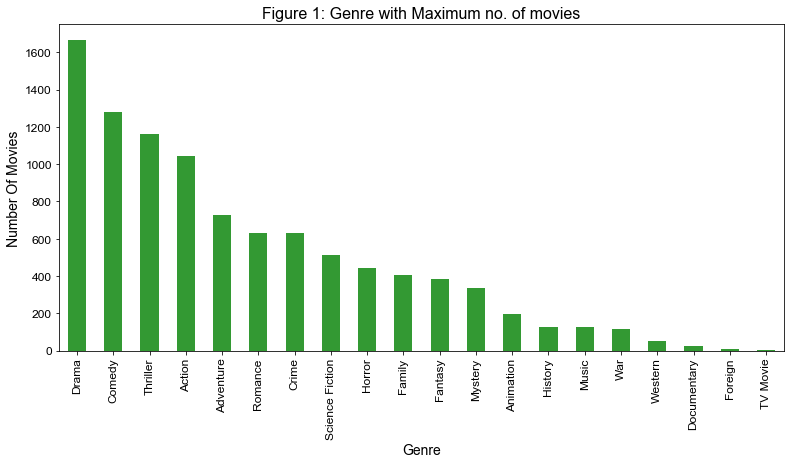

In [34]:
#plotting the data
total_genre.plot(kind= 'bar',figsize = (13,6),fontsize=12, color="g",alpha=.8)
plt.title("Figure 1: Genre with Maximum no. of movies", fontdict={'fontsize': 16})
plt.xlabel('Genre',fontdict={'fontsize': 14})
plt.ylabel("Number Of Movies",fontdict={'fontsize': 14})
sns.set_style("whitegrid")

> Drama genre has maximum no. of movies under it with 1666 releases, followed by Comedy, Thriller and Action. Romance genre comes at 6th position with 628 release between 1960 and 2015.

In [35]:
## make list of all genre,array of all years and popularity
## make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 

## this gives most popular genre for each year

genre_details = list(map(str,(df_movie['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War',
         'Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 
         'Documentary', 'Foreign']

year = np.array(df_movie['release_year'])
popularity = np.array(df_movie['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [36]:
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,1.872132,3.386535,4.865526,3.172561,3.153791,2.532622,0.507168,6.807387,5.031555,2.394635,...,41.728560,36.367612,45.455337,66.043675,67.552506,59.092532,62.935832,72.071823,148.341227,199.382091
Science Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207257,0.000000,4.507375,0.000000,...,16.884195,15.182531,28.526958,55.745086,29.285751,43.341604,38.691505,57.654333,123.985701,167.082032
Fantasy,0.000000,0.000000,0.000000,0.000000,1.987819,0.000000,0.000000,0.241283,0.000000,0.000000,...,26.712414,34.719997,22.940337,36.128989,35.400149,36.661794,36.141987,32.236092,55.176084,43.241109
Crime,0.000000,0.900245,0.810805,0.000000,0.663446,0.000000,0.000000,2.715840,0.786854,1.357317,...,25.523123,29.232102,32.335422,16.239235,24.807818,34.648336,33.753904,43.488062,34.454964,69.647798
Western,1.872132,0.173731,1.033186,0.000000,0.000000,0.000000,0.395668,0.000000,0.621202,1.973206,...,0.463068,1.804135,0.000000,0.000000,3.374361,3.139365,5.944518,1.602102,0.870104,15.009100


In [37]:
## Creating the function to calculate the std deviation

def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.710047,1.437183,2.710171,1.923461,1.022476,1.665470,1.132612,2.442594,2.298155,1.999674,...,0.894935,0.720143,1.010291,1.403242,1.506960,0.930649,1.219930,1.344319,1.663030,1.904432
Science Fiction,-0.713149,-0.762280,-0.623943,-0.750602,-0.911998,-0.781827,0.029983,-0.831207,1.984656,-0.686877,...,-0.256089,-0.353347,0.254749,1.018291,0.061103,0.416913,0.368653,0.876296,1.238743,1.449098
Fantasy,-0.713149,-0.762280,-0.623943,-0.750602,0.307291,-0.781827,-0.732002,-0.715169,-0.711085,-0.686877,...,0.199246,0.636655,0.005408,0.285061,0.292127,0.199042,0.279134,0.051164,0.040041,-0.296684
Crime,-0.713149,-0.177595,-0.068337,-0.750602,-0.505053,-0.781827,-0.732002,0.474892,-0.240488,0.835902,...,0.144147,0.358573,0.424727,-0.458398,-0.108089,0.133371,0.195282,0.416427,-0.320932,0.075571
Western,0.710047,-0.649446,0.084050,-0.750602,-0.911998,-0.781827,0.722680,-0.831207,-0.339560,1.526871,...,-1.016869,-1.031257,-1.018458,-1.065404,-0.917923,-0.894333,-0.781173,-0.943283,-0.906000,-0.694670


In [38]:
## Findig the minimum release year
min_year = df_movie['release_year'].min()

## Findig the maximum release year
max_year = df_movie['release_year'].max()

print(min_year, max_year)

1960 2015


In [39]:
# Creating a series to hold the popular genre between 1960 and 2015
pop_genre = pd.Series(index = range(min_year, max_year + 1))
pop_genre.head(5)

1960   NaN
1961   NaN
1962   NaN
1963   NaN
1964   NaN
dtype: float64

In [40]:
# to identify the genre with maximum standardized popularity value
for i in range(min_year, max_year + 1):
    pop_genre[i] = popular_genre[i].argmax(np.array(i))
    #pop_genre[i] = [popular_genre[popular_genre.idxmax(i)]
pop_genre

C:\Users\Vkelkar\AppData\Local\Continuum\anaconda3\envs\Udacity\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


1960              Drama
1961             Comedy
1962          Adventure
1963           Thriller
1964             Comedy
1965              Drama
1966              Drama
1967          Adventure
1968            Mystery
1969          Adventure
1970             Comedy
1971    Science Fiction
1972              Drama
1973              Drama
1974              Drama
1975              Drama
1976              Drama
1977          Adventure
1978             Horror
1979    Science Fiction
1980             Action
1981          Adventure
1982    Science Fiction
1983             Action
1984             Action
1985          Adventure
1986              Drama
1987             Comedy
1988             Comedy
1989             Comedy
1990              Drama
1991             Action
1992           Thriller
1993              Drama
1994              Drama
1995              Drama
1996              Drama
1997           Thriller
1998              Drama
1999              Drama
2000             Comedy
2001            

In [41]:
#arranging in descending order
Genre_count = pop_genre.value_counts(ascending = False)

In [42]:
Genre_count

Drama              24
Action             10
Comedy              8
Adventure           6
Science Fiction     3
Thriller            3
Mystery             1
Horror              1
dtype: int64

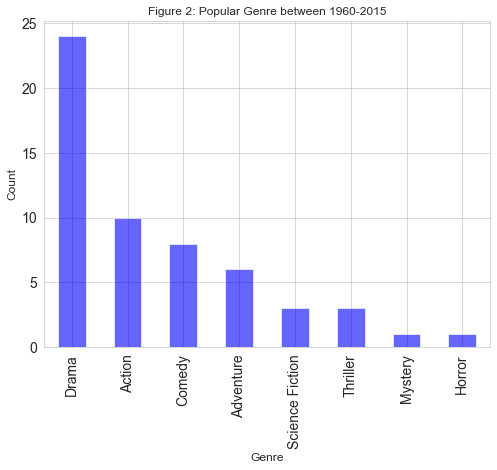

In [43]:
Genre_count.plot(x='Genre', y='Total Count', kind='bar', figsize=(8,6), 
                 title="Figure 2: Popular Genre between 1960-2015", label="Count of Genre",fontsize=14,color='b',alpha = 0.6 )
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12);

Text(0.5, 0, 'Years')

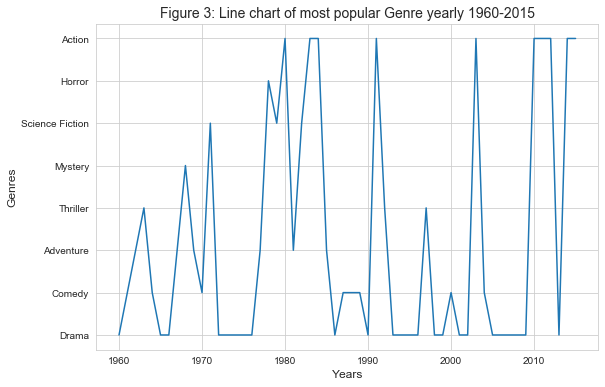

In [44]:
#plotting the graph
plt.figure(figsize=(9, 6))

plt.plot(pop_genre)
plt.title("Figure 3: Line chart of most popular Genre yearly 1960-2015", fontsize = 14)
plt.ylabel("Genres",fontsize = 12)
plt.xlabel("Years", fontsize = 12)

> **Conclusion:** The above  two plots shows the most popular genre from year 1960 to 2015. The most popular genre between 1960-2015 was Drama with count of 24, followed by Action with count of 10 and third most popular genre was Comedy. 

> Fig 3 shows the most popular genre for each year. The popularity changes each year. Its intresting to see that before 1075 science fiction and Action were never the most popular genre. It picked popluarity between 1975 onwards.


### Research Question 2 : What are the Top 10 most profitable movies?

> Let begin by setting up a criteria for "profitable movie". For this we can create a new column that calculates the Profit made by each movie, by substracting Budget from Revenue. We can create a dataset that consist movies that made profit of minimum 50 millions

In [45]:
#Calculate Profit earned and insert it in to original dataset at index 2

df_movie.insert(2,'profit_earned',df_movie['revenue']-df_movie['budget'])

#previewing the changes in the dataset
df_movie.head(2)

,popularity,budget,profit_earned,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [46]:
#selecting the movies having profit $50M or more
profit_data = df_movie[df_movie['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,popularity,budget,profit_earned,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
3,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [47]:
## Findig the minimum Profit movie title
min_Profit = df_movie[['original_title','profit_earned']].min()

## Findig the maximum Profit movie title
max_Profit = df_movie[['original_title','profit_earned']].max()

print(min_Profit, max_Profit)

original_title    (500) Days of Summer
profit_earned               -413912431
dtype: object original_title    ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
profit_earned                2544505847
dtype: object


In [48]:
df_movieProfit = df_movie[['original_title','profit_earned']]
df_movieProfit.head(10)

,original_title,profit_earned
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
5,The Revenant,397950503
6,Terminator Genisys,285603537
7,The Martian,487380321
8,Minions,1082730962
9,Inside Out,678708609


In [49]:
## Sorting the dataframe in descending order by column Profit earned
df_movieProfit.sort_values(by=['profit_earned'],ascending=False)

,original_title,profit_earned
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
...,...,...
4970,Brother Bear,-99999750
3484,Mars Needs Moms,-111007242
7031,The Alamo,-119180039
5508,The Lone Ranger,-165710090


In [50]:
#Selecting top 10 most profiatble movies
df_movieProfit=df_movieProfit.nlargest(10, 'profit_earned')

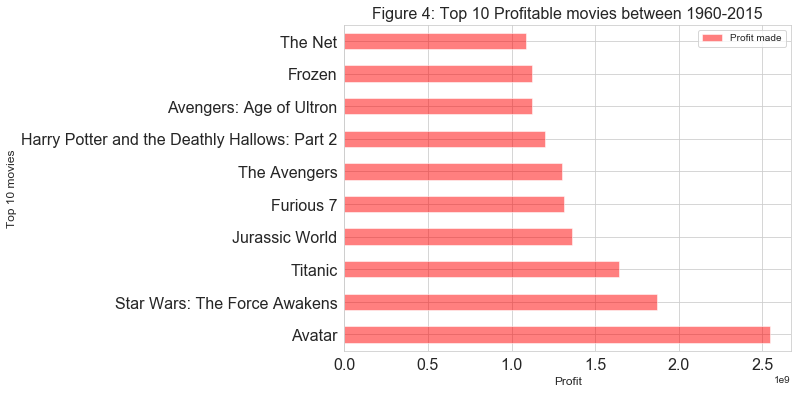

In [51]:
df_movieProfit.plot(x='original_title', y='profit_earned', kind='barh', figsize=(8,6), 
                 label="Profit made",fontsize=16,color='r',alpha = 0.5 )
plt.title("Figure 4: Top 10 Profitable movies between 1960-2015",fontsize=16)
plt.xlabel('Profit',fontsize=12)
plt.ylabel('Top 10 movies',fontsize=12);

 **Conclusion:** The maximum profit was made by movie Avatar of about 2.5 billion  followed by Star Wars:The Force Awakens at 1.8Billion and then Titanic at 1.6B$

### Research Question 3 : What is the relationship between Budget and Profit? Does most expensive movie is most Profitable movie?

> We can answer this question, by creating profit bins and comparing them with the budget column

In [52]:
df_movie['profit_earned'].describe()

count    3.677000e+03
mean     7.332587e+07
std      1.532680e+08
min     -4.139124e+08
25%     -7.971160e+05
50%      2.160924e+07
75%      8.573472e+07
max      2.544506e+09
Name: profit_earned, dtype: float64

In [53]:
# Creating Profit bins to cut the data into groups.
bin_edges = [0, 2.160924e+07,7.332587e+07, 8.573472e+07, 2.544506e+09]

# labels for the profit categories
bin_names = ['Very Low_Profit', 'Low_Profit',"Average_Profit", 'High_Profit']

In [54]:
# create profit categories
df_movie['profit_cat'] = pd.cut(df_movie['profit_earned'], bin_edges, labels=bin_names)

# confirm the creation
df_movie.head()

,popularity,budget,profit_earned,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_cat
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High_Profit
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High_Profit
2,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High_Profit
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High_Profit
4,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High_Profit


In [55]:
# creating averages grouped by the profit categories
Average_budget = df_movie.groupby('profit_cat')['budget_adj'].mean()
Average_budget

profit_cat
Very Low_Profit    2.511660e+07
Low_Profit         3.803940e+07
Average_Profit     4.518647e+07
High_Profit        7.969623e+07
Name: budget_adj, dtype: float64

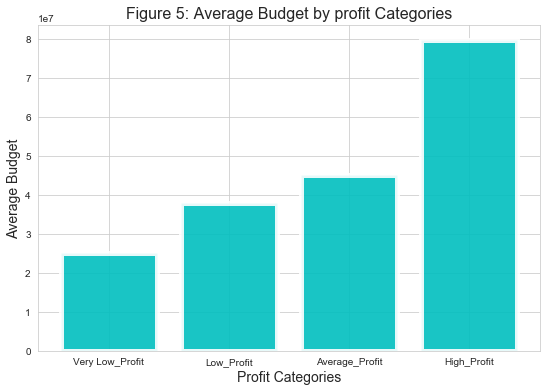

In [64]:
## Creating the Labels to hold the values and plotting them into bar chart

locations = [1,2,3,4]
heights = [Average_budget['Very Low_Profit'], Average_budget['Low_Profit'], Average_budget['Average_Profit'], Average_budget['High_Profit']]
labels = ['Very Low_Profit', 'Low_Profit',"Average_Profit", 'High_Profit']
plt.figure(figsize=(9, 6))
plt.bar(locations, heights, color='c', alpha=.9, tick_label=labels, linewidth=5)
plt.title('Figure 5: Average Budget by profit Categories', fontdict={'fontsize': 16})
plt.xlabel('Profit Categories', fontdict={'fontsize': 14})
plt.ylabel('Average Budget', fontdict={'fontsize': 14});

> Fig 5 shows that high budget movies usually have higher profit. Its may make sense in few cases, but lets investigate it more to understand the relationship 

In [57]:
#Selecting top 10 most profiatble movies
df_movieProfit=df_movie.nlargest(10, 'profit_earned')

In [58]:
d1=df_movieProfit[['original_title',"profit_earned","budget"]]

In [59]:
d1

,original_title,profit_earned,budget
1386,Avatar,2544505847,237000000
3,Star Wars: The Force Awakens,1868178225,200000000
5231,Titanic,1645034188,200000000
0,Jurassic World,1363528810,150000000
4,Furious 7,1316249360,190000000
4361,The Avengers,1299557910,220000000
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,125000000
14,Avengers: Age of Ultron,1125035767,280000000
5422,Frozen,1124219009,150000000
8094,The Net,1084279658,22000000


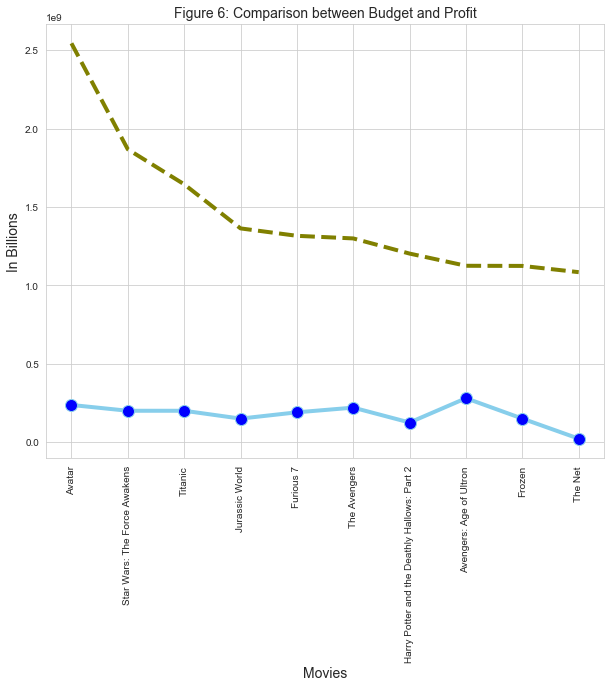

In [76]:
# multiple line plot
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.plot( 'original_title',"budget" ,data=d1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( "original_title",'budget', data=d1, marker='', color='olive', linewidth=2)
plt.plot( 'original_title', 'profit_earned', data=d1, marker='', color='olive', linewidth=4, linestyle='dashed', label="Profit")
plt.title("Figure 6: Comparison between Budget and Profit", fontsize = 14)
plt.xlabel("Movies",fontsize = 14)
plt.ylabel("In Billions",fontsize = 14)
plt.legend()
plt.legend().remove()

> The fig 5 showes the higher budget movies usually make high profit. The average budget for movie falling in high profit category is 708 Million dollars. But not neccesarily that higher budget movie will always result in higher profit. 
>
>Fig 6 shows, the movie like Avengers had higher budget, more than the most profitable movie-Avatar.But it didnt make as much of a profit.Avengers is the 8th most profitable movie but budget wise, its most expensive movie.
>
> **Conclusion:** There is no direct relationship between Profit and budget.

### Research Question 4: Which is most successfull movie in terms of revenue and budget and whats the associated rating ?

> This involves creating a new calculated column "success" that is derivative of revenue and budget

In [61]:
# Creating the new column 'success'
df_movie['success'] = (df_movie['revenue_adj'] - df_movie['budget_adj']) / df_movie['budget_adj']

df_movie['Peoples choice'] = df_movie['popularity']/df_movie['vote_average']*100

In [62]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 20 columns):
popularity              3677 non-null float64
budget                  3677 non-null int64
profit_earned           3677 non-null int64
revenue                 3677 non-null int64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
profit_cat              2692 non-null category
success                 3677 non-null float64
Peoples choice          36

In [65]:
# creating averages grouped by the profit categories
Average_success = df_movie.groupby('profit_cat')['success'].mean()
Average_success

profit_cat
Very Low_Profit     106.440677
Low_Profit            6.690796
Average_Profit        5.284920
High_Profit        1140.766431
Name: success, dtype: float64

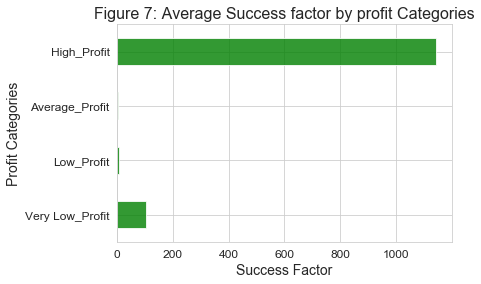

In [67]:
Average_success.plot(kind ="barh",color='g', alpha=.8 ,fontsize=12)
#plt.bar(locations, heights, color='#007acc', alpha=.8, tick_label=labels, linewidth=5)
plt.title('Figure 7: Average Success factor by profit Categories', fontdict={'fontsize': 16})
plt.ylabel('Profit Categories', fontdict={'fontsize': 14})
plt.xlabel('Success Factor', fontdict={'fontsize': 14});

> The above plot shows, the higher profit has higher success factor. Its intersting to note, category 'Very Low_Profit' has higher success than Low and Average category. The reason behind this is may be due to low budget for most of the movies falling under Very LowProfit category and comparitively higher revenue, as while calculating the column Success, budget is the numerator and revenue is a denomiator.


In [68]:
df_movieSuccess = df_movie[["original_title","profit_earned","profit_cat",'success','vote_average',"vote_count",'popularity',"runtime","Peoples choice",
                            'budget_adj',"revenue_adj"]]
#Selecting top 10 most profiatble movies
df_movieSuccess=df_movieSuccess.nlargest(10, 'profit_earned')

In [69]:
df_movieSuccess

,original_title,profit_earned,profit_cat,success,vote_average,vote_count,popularity,runtime,Peoples choice,budget_adj,revenue_adj
1386,Avatar,2544505847,High_Profit,10.736312,7.1,8458,9.432768,162.0,132.855887,2.408869e+08,2.827124e+09
3,Star Wars: The Force Awakens,1868178225,High_Profit,9.340891,7.5,5292,11.173104,136.0,148.974720,1.839999e+08,1.902723e+09
5231,Titanic,1645034188,High_Profit,8.225171,7.3,4654,4.355219,194.0,59.660534,2.716921e+08,2.506406e+09
0,Jurassic World,1363528810,High_Profit,9.090192,6.5,5562,32.985763,124.0,507.473277,1.379999e+08,1.392446e+09
4,Furious 7,1316249360,High_Profit,6.927628,7.3,2947,9.335014,137.0,127.876904,1.747999e+08,1.385749e+09
4361,The Avengers,1299557910,High_Profit,5.907081,7.3,8903,7.637767,143.0,104.626945,2.089437e+08,1.443191e+09
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,High_Profit,9.622543,7.7,3750,5.711315,130.0,74.172922,1.211748e+08,1.287184e+09
14,Avengers: Age of Ultron,1125035767,High_Profit,4.017985,7.4,4304,5.944927,141.0,80.336851,2.575999e+08,1.292632e+09
5422,Frozen,1124219009,High_Profit,7.494793,7.5,3369,6.112766,102.0,81.503547,1.404050e+08,1.192711e+09
8094,The Net,1084279658,High_Profit,49.285439,5.6,201,1.136610,114.0,20.296607,3.148127e+07,1.583050e+09


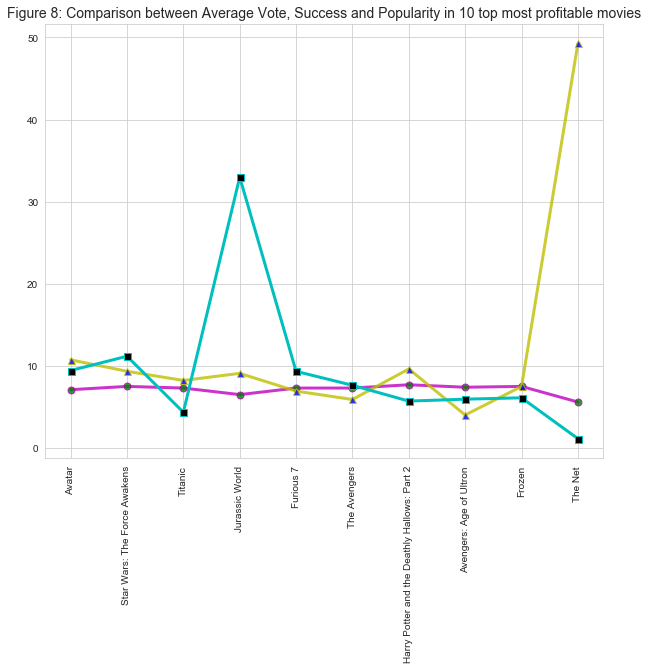

In [72]:
# multiple line plot
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.plot( 'original_title',"vote_average" ,data=df_movieSuccess, marker='o', markerfacecolor='green', markersize=7, color='m',alpha =0.8,linewidth=3,label ="Average Vote")
plt.plot( "original_title",'success', data=df_movieSuccess, marker='^',markerfacecolor='blue',markersize=7, color='y',alpha =0.8, linewidth=3,label="Success")
plt.plot( 'original_title', 'popularity', data=df_movieSuccess, marker='s',markerfacecolor='black', markersize=7, color='c', linewidth=3, label="Popularity")
plt.title("Figure 8: Comparison between Average Vote, Success and Popularity in 10 top most profitable movies", fontsize = 14)
plt.legend()
plt.legend().remove()

> The above plots shows the relationship between Vote_average, popularity and Success columns. Its interesting to see Jurassic Park had higher Popularity, but comparitively lower vote average and Success. 
>
>Also the spike in Sucess factor for movie "The Net" may be due to the way Success is calculated. Reason is explained above.

In [77]:
#Selecting top 10 most highest budget movies
df_moviesuccess=df_movie.nlargest(10, 'success')
## Sorting the dataframe in descending order
df_moviesuccess.sort_values(by=['success'],ascending=False)

,popularity,budget,profit_earned,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_cat,success,Peoples choice
10495,0.772494,113,115103866,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,martial arts|karate|okinawa|revanche|self esteem,113.0,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986,224.802924,2.289886e+08,High_Profit,1.018618e+06,13.318862
6179,0.132713,114,6699886,6700000,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,John Landis,adultery|assassin|airport|daily life|chase,115.0,Comedy|Drama|Thriller,Universal Pictures,1985-02-15,24,6.1,1985,231.096930,1.358201e+07,Very Low_Profit,5.877093e+04,2.175623
3608,0.463510,93,2499907,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,Angel Gracia,tattoo|cooking|bankrupt|sacrifice|latina,107.0,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,2011-01-28,47,5.2,2011,90.154018,2.423495e+06,Very Low_Profit,2.688072e+04,8.913654
7447,1.120442,15000,193340800,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,haunting|psychic|entity|demonic possession|fou...,86.0,Horror|Mystery,Blumhouse Productions|Solana Films,2007-09-14,714,6.1,2007,15775.028739,2.033462e+08,High_Profit,1.288939e+04,18.367902
2449,0.934621,25000,247975000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,witch|voodoo|legend|sorcery|maryland,81.0,Horror|Mystery,Artisan Entertainment|Haxan Films,1999-07-14,522,6.3,1999,32726.321165,3.246451e+08,High_Profit,9.919000e+03,14.835254
3581,0.520430,1,1377,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,wedding vows|marriage|love,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1.335831e+03,Very Low_Profit,1.377000e+03,9.819434
1354,0.331417,10000,6990000,7000000,Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,David Lynch,baby|mutant|claustrophobia|nightmare|parents-i...,89.0,Science Fiction|Fantasy|Horror|Drama,American Film Institute (AFI)|Libra Films,1977-03-19,194,7.1,1977,35977.810326,2.518447e+07,Very Low_Profit,6.990000e+02,4.667845
7277,0.412913,12000,5988000,6000000,Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,gay|trailer park|pop culture|drug dealer|heroin,93.0,Comedy,Dreamland Productions,1972-03-12,51,6.3,1972,62574.731176,3.128737e+07,Very Low_Profit,4.990000e+02,6.554175
7178,0.263897,65000,28510078,28575078,Super Size Me,Morgan Spurlock|Daryl Isaacs|Lisa Ganjhu|Steph...,Morgan Spurlock,experiment|health|junk food|food industry|fast...,100.0,Documentary|Comedy|Drama,Kathbur Pictures,2004-01-17,295,6.5,2004,75038.950988,3.298837e+07,Low_Profit,4.386166e+02,4.059954
242,0.532205,100000,42564410,42664410,The Gallows,Cassidy Gifford|Ryan Shoos|Pfeifer Brown|Reese...,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87.0,Horror|Thriller,New Line Cinema|Blumhouse Productions|Manageme...,2015-07-10,247,5.0,2015,91999.959520,3.925124e+07,Low_Profit,4.256441e+02,10.644100


In [78]:
d4=df_moviesuccess[["original_title","success"]]
d4=d4.set_index('original_title')
d4

,success
original_title,
"The Karate Kid, Part II",1.018618e+06
Into the Night,5.877093e+04
From Prada to Nada,2.688072e+04
Paranormal Activity,1.288939e+04
The Blair Witch Project,9.919000e+03
"Love, Wedding, Marriage",1.377000e+03
Eraserhead,6.990000e+02
Pink Flamingos,4.990000e+02
Super Size Me,4.386166e+02


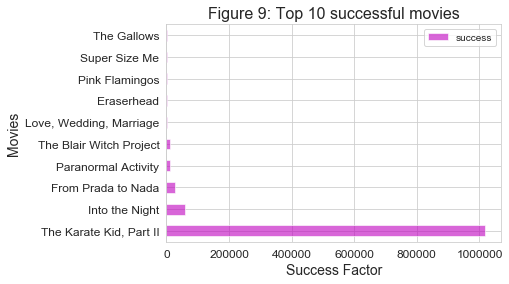

In [83]:
d4.plot(kind ="barh",color='m', alpha=.6 ,fontsize=12)
plt.title('Figure 9: Top 10 successful movies', fontdict={'fontsize': 16})
plt.ylabel('Movies', fontdict={'fontsize': 14})
plt.xlabel('Success Factor', fontdict={'fontsize': 14});

> **Conclusion:** The most successful movie between 1960 and 2015 was "The Karate Kid-II".

In [100]:
# creating averages grouped of peoples choice by the profit categories
Peoples_choice = df_movie.groupby('profit_cat')['Peoples choice'].mean()
Peoples_choice

profit_cat
Very Low_Profit    12.494787
Low_Profit         17.939410
Average_Profit     21.145992
High_Profit        35.207455
Name: Peoples choice, dtype: float64

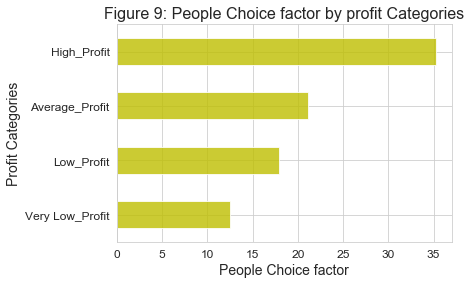

In [128]:
Peoples_choice.plot(kind ="barh",color='y', alpha=.8 ,fontsize=12)
plt.title('Figure 9: People Choice factor by profit Categories', fontdict={'fontsize': 16})
plt.ylabel('Profit Categories', fontdict={'fontsize': 14})
plt.xlabel('People Choice factor', fontdict={'fontsize': 14});

>The above plot shows relationship between calculated column People's Choice and Profit Categories. The High_Profit category has a higher People Choice factor. This is very intutitve as movies that receive more popularity and vote count end up being watched more often, thus resulting in a higher profit. 

In [131]:
#Selecting top 10 most highest budget movies
d5=df_movie.nlargest(20, 'Peoples choice')
d5 = d5.sort_values(by=['Peoples choice'],ascending=False)
d5a=d5[["original_title","Peoples choice", "profit_earned","popularity","vote_count"]]
d5a=d5a.set_index('original_title')
d5a

,Peoples choice,profit_earned,popularity,vote_count
original_title,,,,
Jurassic World,507.473277,1363528810,32.985763,5562
Mad Max: Fury Road,400.280789,228436354,28.419936,6185
Interstellar,311.864175,456752480,24.949134,6498
Insurgent,208.135032,185238201,13.112507,2480
Guardians of the Galaxy,181.154494,603312399,14.311205,5612
Captain America: The Winter Soldier,170.671408,544766572,12.971027,3848
John Wick,163.182157,58739897,11.422751,2712
The Hunger Games: Mockingjay - Part 1,162.712258,627100229,10.739009,3590
Star Wars,152.378899,764398007,12.037933,4428


> The above table shows the top 20 highest Peoples choice factor movie. Note that some of the movies here have higher profit, for example Star Wars. 

> It has higher profit than Jurassic park, yet lower Poeples Choice. This is due to almost similar votecount between the two movies.

In [102]:
df_movie['budget_adj'].describe()

count    3.677000e+03
mean     4.538793e+07
std      4.519195e+07
min      9.693980e-01
25%      1.381637e+07
50%      3.108049e+07
75%      6.216097e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [103]:
# Creating budget bins to cut the data into groups.
bud_edges = [0, 1.381637e+07,3.108049e+07, 4.538793e+07, 4.250000e+08]

# labels for the profit categories
bin_names = ['Very Low_Budget', 'Low_Budget',"Average_Budget", 'High_Budget']

In [105]:

df_movie['Budget_cat'] = pd.cut(df_movie['budget_adj'], bud_edges, labels=bin_names)

# confirm the creation
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 21 columns):
popularity              3677 non-null float64
budget                  3677 non-null int64
profit_earned           3677 non-null int64
revenue                 3677 non-null int64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
profit_cat              2692 non-null category
success                 3677 non-null float64
Peoples choice          36

In [106]:
# creating averages grouped  of revenue by the budget categories
Average_revenue = df_movie.groupby('Budget_cat')['revenue_adj'].mean()
Average_revenue

Budget_cat
Very Low_Budget    4.232338e+07
Low_Budget         8.371597e+07
Average_Budget     1.302696e+08
High_Budget        2.584231e+08
Name: revenue_adj, dtype: float64

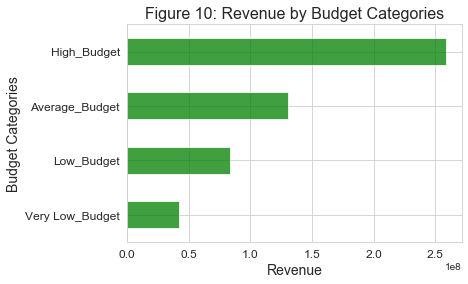

In [108]:
Average_revenue.plot(kind ="barh",color='g', alpha=.75 ,fontsize=12)
plt.title('Figure 10: Revenue by Budget Categories', fontdict={'fontsize': 16})
plt.ylabel('Budget Categories', fontdict={'fontsize': 14})
plt.xlabel('Revenue', fontdict={'fontsize': 14});

> The graph shows the relationship between budget and revenue. According to the graph, the higher budget movies result in higher revenue. Lets investigate this relationship little further by plotting 20 highest budgeted movies againt their revenue.

In [109]:
#Selecting top 10 most highest budget movies
df_movieBudget=df_movie.nlargest(20, 'budget_adj')
## Sorting the dataframe in descending order
df_movieBudget.sort_values(by=['budget_adj'],ascending=False)

,popularity,budget,profit_earned,revenue,original_title,cast,director,keywords,runtime,genres,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_cat,success,Peoples choice,Budget_cat
2244,0.250540,425000000,-413912431,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,...,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,NaN,-0.973912,3.914687,High_Budget
3375,4.955130,380000000,641683000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136.0,Adventure|Action|Fantasy,...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,High_Profit,1.688639,78.652857,High_Budget
7387,4.965391,300000000,661000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,ocean|drug abuse|exotic island|east india trad...,169.0,Adventure|Fantasy|Action,...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,High_Profit,2.203333,73.020456,High_Budget
6570,1.957331,270000000,121081192,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,saving the world|dc comics|invulnerability|seq...,154.0,Adventure|Fantasy|Action|Science Fiction,...,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08,High_Profit,0.448449,36.930774,High_Budget
5231,4.355219,200000000,1645034188,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,Drama|Romance|Thriller,...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,High_Profit,8.225171,59.660534,High_Budget
7394,2.520912,258000000,632871626,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,dual identity|amnesia|sandstorm|love of one's ...,139.0,Fantasy|Action|Adventure,...,2007-05-01,2083,5.8,2007,2.713305e+08,9.369017e+08,High_Profit,2.452991,43.464000,High_Budget
1929,2.865684,260000000,331794936,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,hostage|horse|fairy tale|musical|princess,100.0,Animation|Family,...,2010-11-24,2019,7.3,2010,2.600000e+08,5.917949e+08,High_Profit,1.276134,39.255945,High_Budget
14,5.944927,280000000,1125035767,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,Action|Adventure|Science Fiction,...,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,High_Profit,4.017985,80.336851,High_Budget
1389,5.076472,250000000,683959197,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,witch|broom|school of witchcraft|magic wand|ma...,153.0,Adventure|Fantasy|Family,...,2009-07-07,3220,7.3,2009,2.541001e+08,9.492765e+08,High_Profit,2.735837,69.540712,High_Budget
8089,1.232098,175000000,89218220,264218220,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,Kevin Reynolds,ocean|tattoo|mutant|water|dystopia,135.0,Adventure|Action,...,1995-07-28,557,5.8,1995,2.504192e+08,3.780875e+08,High_Profit,0.509818,21.243069,High_Budget


In [110]:
# creating dataframe with three columns under investigation
d2=df_movieBudget[['original_title',"budget_adj","revenue_adj","profit_earned"]]

In [111]:
d2

,original_title,budget_adj,revenue_adj,profit_earned
2244,The Warrior's Way,4.250000e+08,1.108757e+07,-413912431
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08,9.904175e+08,641683000
7387,Pirates of the Caribbean: At World's End,3.155006e+08,1.010654e+09,661000000
6570,Superman Returns,2.920507e+08,4.230205e+08,121081192
5231,Titanic,2.716921e+08,2.506406e+09,1645034188
7394,Spider-Man 3,2.713305e+08,9.369017e+08,632871626
1929,Tangled,2.600000e+08,5.917949e+08,331794936
14,Avengers: Age of Ultron,2.575999e+08,1.292632e+09,1125035767
1389,Harry Potter and the Half-Blood Prince,2.541001e+08,9.492765e+08,683959197
8089,Waterworld,2.504192e+08,3.780875e+08,89218220


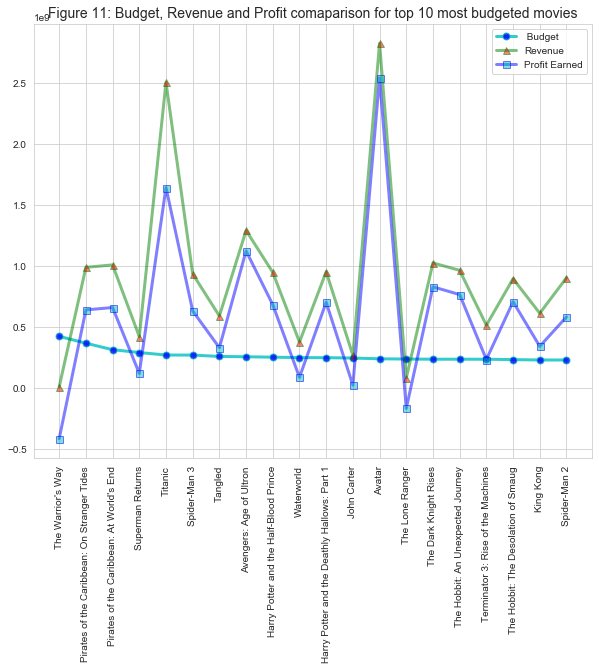

In [116]:
# multiple line plot
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.title("Figure 11: Budget, Revenue and Profit comaparison for top 10 most budgeted movies",fontsize=14)
plt.plot( 'original_title',"budget_adj" ,data=d2, marker='o', markerfacecolor='blue', markersize=7, color='c',alpha =0.8,linewidth=3,label =" Budget")
plt.plot( "original_title",'revenue_adj', data=d2, marker='^',markerfacecolor='r',markersize=7, color='g',alpha =0.5, linewidth=3,label="Revenue")
plt.plot( 'original_title', 'profit_earned', data=d2, marker='s',markerfacecolor='c', markersize=7, color='b', alpha =0.5,linewidth=3, label="Profit Earned")
plt.legend()


> The above plot shows, Profit and Revenue almost goes hand in hand. However even lower budget movies can make higher profit in comparision to the higher budget movies as seen in the case of movies like Titanic, Avatar and Harry Potter.

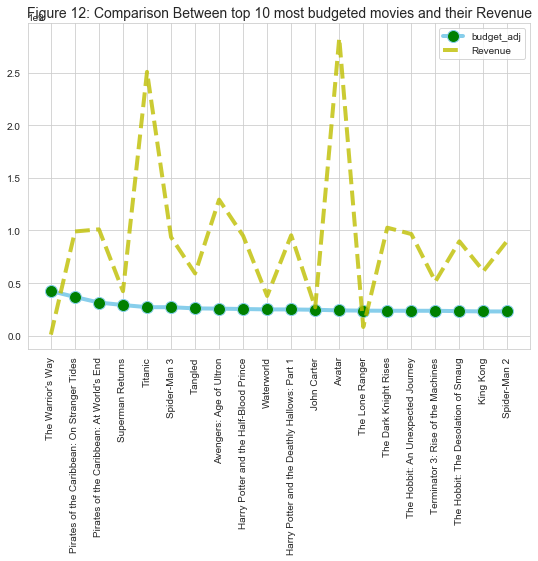

In [117]:
# multiple line plot
plt.figure(figsize=(9,6))
plt.xticks(rotation=90)
plt.title('Figure 12: Comparison Between top 10 most budgeted movies and their Revenue', fontdict={'fontsize': 14})
plt.plot( 'original_title',"budget_adj" ,data=d2, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=4)
#plt.plot( "original_title",'budget', data=d1, marker='', color='olive', linewidth=2)
plt.plot( 'original_title', 'revenue_adj', data=d2, marker='', color='y', alpha =0.8,linewidth=4, linestyle='dashed', label="Revenue")
plt.legend()

> The Fig 12 shows the relationship between budget and revenue of 20 top most budgeted movies. We saw earlier that higher budget movies usually result in higher revenue, followed by Avengers which is at 8th position in the top most budgeted movies. However, according to above plot movie Titanic at position 5th in budget makes the highest revenue. The highest budgeted movie - Warrior's Way makes far lesser revenue than other movies that had lesser budget.
>

> **Conclusion:** Thus there is no direct relationship between budget and revenue.

In [118]:
from scipy.stats import norm 

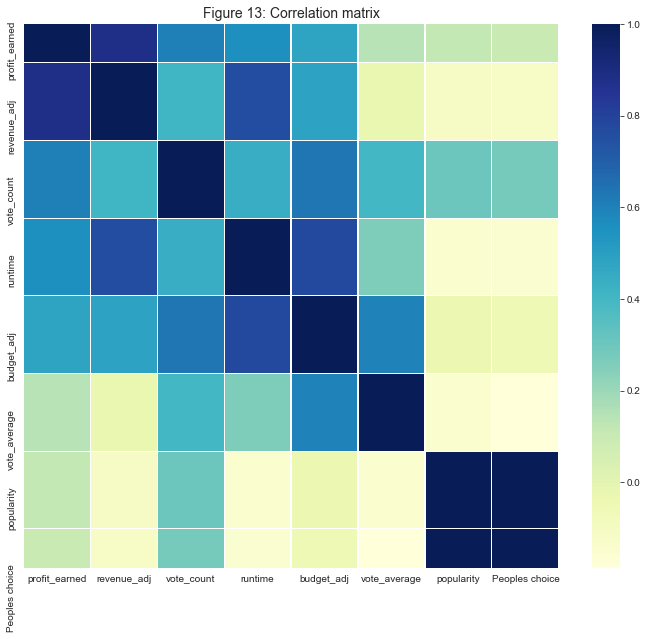

In [119]:
# Revenue correlation matrix 
# k : number of variables for heatmap 
k = 8


corrmat = df_movieSuccess.corr() 

cols = corrmat.nlargest(k, 'profit_earned')['profit_earned'].index 
  
cm = np.corrcoef(df_movieSuccess[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
ax.set_title('Figure 13: Correlation matrix', fontsize = 14)

sns.heatmap(cm ,ax = ax,cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)

> The correlation heat map above shows the correlation between the profit_earned and 8 other variables of the data. Revenue is most correlated to Profit earned. This we saw earlier as well. Its followed by  vote count and runtime being most correlated variable to profit. This makes absolute sense, as more the vote_count and runtime, higher the profit as people like the movie more.

>Interestingly, Peoples choice, vote_average and popularity are weakly correlated variables to profit.  we have seen this in case of movie Jurassic park that had higher popularity but lower profit in comparison.


<a id='conclusions'></a>
## Conclusions

The most popular genre between 1960-2015 was **Drama followed by Comedy**. Movie **Avatar was the most Profitable movie**. Although it may be expected higher budget movies consistenly make higher profit, but that's not always the case. As seen by the example of movie Avengers that had higher budget but in comparison lower profit.

Similarly as seen in the case of Popularity and Profit. Jurassic park had highest popularity, but in comparison had lower profits.

Thus there is not direct relationship between profit, budget and popularity.

However to draw relationship between popularity and vote, Peoples choice column was created and its usually seen the movies with higher Peoples choice factor resulted in higher profit. But there is no direct relationship between the two, as seen in the case of movies Star War and Jurassic park. Start War had higher profit but lower Peoples choice factor in comparison to Jurassic Park.

The most successful movie was **Karate kid -II**. The calculated column success is derivative of budget and revenue column.

Profit and Revenue followes same pattern. Movies that have higher revenue make more profit, this is due to higher correlation between the two.But in case of budget, its not the case. **Budget and Profit are two independent variables**. Movies like Warrior's Way had higher budget than Movie Titanic but end up making lower profit than Titanic.

>**Limitation of Data**

> 1. ***The presence of many Zeros*** :- Data consisted of many zero values for important variables like budget, budget_Adj, revenue, revenue_adj, cast, director and runtime. Out of these, budget, revenue and runtime are the most important variables. Presence of too many zero screw the data to the left and creates a biasness in the data. To deal with this scenario, Zeros were replaced by NaN(nulls) and then dropped.
This resulted in reduction of observations from approximately 10855 to 3677. This is almost 70% reduction in the data. This is a huge drop in the datasize and such a small sample may not be enough to represnt the entire population and could result in inaccurate analysis.

> 2. ***Need of couple of more numerical relevant variables*** :- I felt there could be few more revelant variables in the dataset. Many of the existing variables like production_company, tagline, homepage, release_date and overview were not relevant for the questions addressed in this exercise. Also, there were variables that represented similar data points like budget and budget_adj, revenue and revenue_adj, vote_count and average_vote, release_date and release_year.

> 3. ***Combining too many years of data*** :- The movie dataset has movies released between 1960 and 2015. I feel that too big of a timespan to compare movies profit, budget and revenue with each other as the technoloy has changed hugely between these years. There is no comparison to technology and challenges faced during movie making in 1960s to 2015s. 
The value of money or dollar value has also changed. A movie could be produced in 1960 in few grands, but now no. are more frequently in billions. May be 10-20 years of data could more accurately project the comparisons and results.


